In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import ssl
import urllib.request

In [2]:
from tensorflow.keras import datasets , layers , models

In [3]:
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

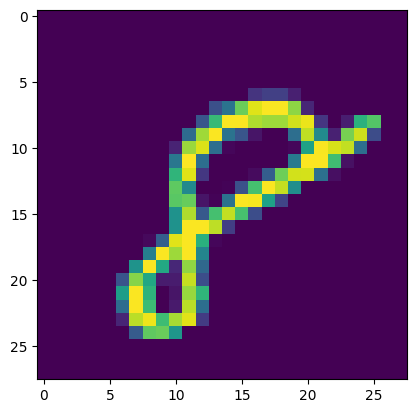

In [9]:
plt.imshow(x_train[59999])

In [10]:
classes = ["0" , "1" , "2" , "3" , "4" , "5" ,"6" , "7" , "8" , "9"]

In [11]:
def plotImg(x , y  , i):
    plt.figure(figsize=(4 , 4))
    plt.imshow(x[i])
    plt.xlabel(classes[y[i]])

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
y_train = y_train.reshape( -1,)

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

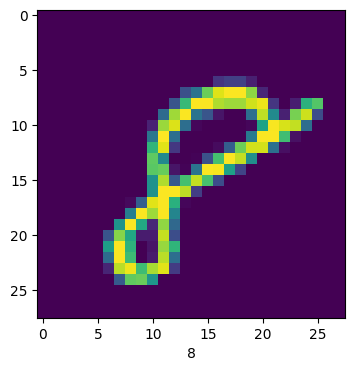

In [15]:
plotImg(x_train , y_train  , 59999)

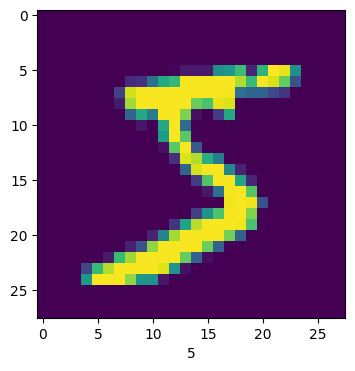

In [16]:
plotImg(x_train , y_train  , 0)

In [17]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [18]:
x_train = x_train/255
x_test = x_test/255

In [19]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

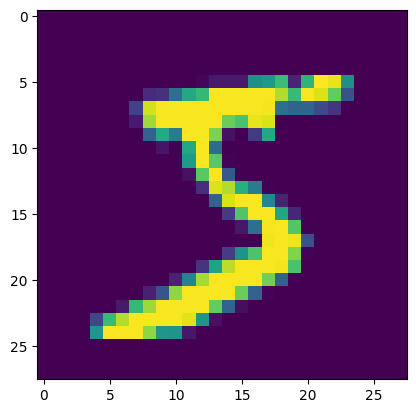

In [20]:
plt.imshow(x_train[0])

In [21]:
ann = models.Sequential([
    layers.Flatten(input_shape = (28 , 28 , 1)),

    layers.Dense(3000, activation = 'relu'),
 

    layers.Dense(100, activation = 'relu'),
    
    
    layers.Dense(10, activation = 'sigmoid')
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
ann.compile(optimizer="Adam" , loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# fit  or traini9ng the ann model
ann.fit(x_train , y_train , epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9086 - loss: 0.2999
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9759 - loss: 0.0798
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9828 - loss: 0.0533
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9880 - loss: 0.0366
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9910 - loss: 0.0283
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9926 - loss: 0.0234
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9942 - loss: 0.0195
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9946 - loss: 0.0182
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9958 - loss: 0.0130
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9947 - loss: 0.0180


In [24]:
ann.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.1216


[0.10012561827898026, 0.9781000018119812]

In [25]:
from sklearn.metrics import confusion_matrix , classification_report

In [26]:
y_pred = ann.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.5872311e-08, 8.2314038e-01, 4.1204476e-01, ..., 1.0000000e+00,
        5.3635550e-01, 3.3423042e-01],
       [8.2374017e-06, 3.5298482e-01, 1.0000000e+00, ..., 1.7912398e-09,
        5.6274410e-04, 1.2123375e-08],
       [7.8328785e-06, 9.9999982e-01, 3.4014741e-03, ..., 1.4132120e-03,
        5.3224176e-01, 5.3072599e-05],
       ...,
       [9.2295685e-11, 1.3552152e-01, 1.4491996e-12, ..., 1.3697034e-01,
        9.9741948e-01, 9.9613965e-01],
       [6.1944053e-03, 1.5403348e-01, 3.7203499e-08, ..., 1.3181262e-05,
        9.9982107e-01, 2.7696951e-03],
       [9.1881753e-05, 1.0241260e-04, 1.4229184e-09, ..., 7.1554051e-16,
        3.9464650e-01, 2.5147715e-08]], dtype=float32)

In [27]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [28]:
print(classification_report(y_test , y_pred_classes))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.87      0.98      0.92      1010
           4       0.94      0.99      0.96       982
           5       0.99      0.83      0.90       892
           6       0.97      0.97      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.99      0.93      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [33]:
cnn=models.Sequential([
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
                       layers.MaxPooling2D((2,2)),
                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),                    
                       layers.Flatten(),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(10,activation='softmax')])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [35]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9075 - loss: 0.3004
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9859 - loss: 0.0458
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9909 - loss: 0.0322
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9936 - loss: 0.0205
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9949 - loss: 0.0162
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9965 - loss: 0.0113
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9968 - loss: 0.0101
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9974 - loss: 0.0075
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9972 - loss: 0.0072
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9983 - loss: 0.0052


In [ ]:
y_test
y_test=y_test.reshape(-1,)

In [36]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

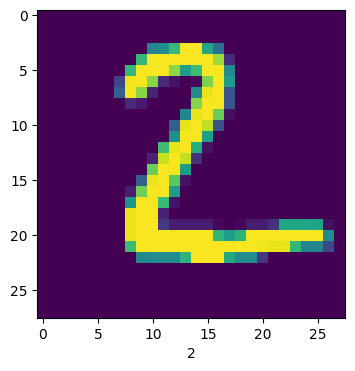

In [38]:
plotImg(x_test,y_test,1)

In [41]:
y_pred=cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [42]:
y_pred[:5]

array([[3.0079929e-14, 8.4751265e-13, 1.4461815e-12, 1.5879780e-11,
        7.0118494e-11, 4.3632823e-15, 1.4495633e-21, 1.0000000e+00,
        1.6891619e-12, 1.3070989e-09],
       [1.4805669e-16, 3.0784889e-12, 1.0000000e+00, 5.0467173e-19,
        1.9875836e-16, 4.8607057e-24, 8.5134921e-13, 2.0791164e-19,
        8.5009675e-20, 5.9626884e-17],
       [6.5210494e-13, 1.0000000e+00, 4.3204316e-09, 1.1503614e-14,
        1.7786711e-08, 7.7823442e-10, 5.3478244e-10, 3.1540434e-08,
        2.7602215e-10, 9.0599472e-11],
       [1.0000000e+00, 3.0858840e-16, 2.4014962e-13, 1.1821459e-12,
        1.6034805e-13, 2.6580901e-11, 3.0856967e-08, 3.3237136e-14,
        3.9323362e-12, 1.0257418e-10],
       [3.2953531e-12, 1.8022077e-13, 7.5047032e-13, 3.6031456e-13,
        9.9999928e-01, 7.2385886e-12, 3.2776400e-11, 2.4689766e-12,
        4.1147454e-11, 7.4173505e-07]], dtype=float32)

In [43]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [44]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.87      0.98      0.92      1010
           4       0.94      0.99      0.96       982
           5       0.99      0.83      0.90       892
           6       0.97      0.97      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.99      0.93      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

